К уроку приложен реальный датасет по когорте пациентов с одним из наиболее агрессивных раков — с раком поджелудочной железы.
-Препроцессируйте уже анонимизированные данные, интегрируйте разделы датасета с помощью функций семейства _ join.
-Сделайте описательные статистики датасета, не забудьте посмотреть, что за тип переменных содержится в колонках.
-Попробуйте проверить несколько гипотез с помощью статистических тестов (на качественных переменных) и сделайте анализ выживаемости.
-В каких группах (по каким переменным) выживаемость отличается?

In [2]:
library(ggplot2)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
 install.packages("gtsummary")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘V8’, ‘reactR’, ‘bigD’, ‘bitops’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘cards’, ‘gt’




In [4]:
 install.packages("tidycmprsk")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cmprsk’, ‘hardhat’




In [5]:
library(survival)
library(gtsummary)
library(tidycmprsk)


Attaching package: ‘tidycmprsk’


The following object is masked from ‘package:gtsummary’:

    trial




In [6]:
clinical <- read.csv('/content/clinical.tsv', header = TRUE, sep = '\t')
head(clinical)

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_birth,country_of_residence_at_enrollment,days_to_birth,⋯,treatment_dose_units,treatment_duration,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_outcome_duration,treatment_type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,00061f34-c891-4f9c-b8d6-3ca68b98c875,AD1348,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
2,0035b612-8955-4da5-a35d-bced5b32cbec,AD258,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
3,008147fd-3235-4bab-b816-7589590959d1,AD10836,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
4,00f67c2e-b77f-4082-907c-1dd4ea418f14,AD12672,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
5,01462f16-c767-40ee-8c81-d3927d308aa8,AD8272,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
6,014cd6ee-733c-4894-997e-cfb534a587c1,AD15735,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [7]:
expo <- read.csv('/content/exposure.tsv', header = TRUE, sep = '\t')
head(expo)

,case_id,case_submitter_id,project_id,age_at_last_exposure,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_frequency,alcohol_history,alcohol_intensity,⋯,type_of_smoke_exposure,type_of_tobacco_used,use_per_day,years_smoked,bmi,height,marijuana_use_per_week,smokeless_tobacco_quit_age,tobacco_use_per_day,weight
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,'--,'--,'--,'--,'--,Yes,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
2,01b7ac35-49e3-48db-a081-2971b807445f,C3N-02696,CPTAC-3,'--,'--,'--,'--,'--,Yes,Occasional Drinker,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
3,0251b915-6bf6-43a3-b3a3-aadbac0be13f,HCM-BROD-0204-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,Unknown,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
4,0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,Non-Drinker,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
5,02dbd5fa-e31f-4486-8df8-5b851f2e92bd,TCGA-HZ-8315,TCGA-PAAD,'--,'--,'--,'--,'--,Not Reported,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
6,02ef2e1a-5afe-4c00-a3ea-7f4a153f1da4,TCGA-HZ-8636,TCGA-PAAD,'--,'--,'--,'--,'--,No,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [8]:
family_hist <- read.csv('/content/family_history.tsv', header = TRUE, sep = '\t')
head(family_hist)

,case_id,case_submitter_id,project_id,relationship_age_at_diagnosis,relationship_gender,relationship_primary_diagnosis,relationship_type,relative_deceased,relative_smoker,relative_with_cancer_history,relatives_with_cancer_history_count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0251b915-6bf6-43a3-b3a3-aadbac0be13f,HCM-BROD-0204-C25,HCMI-CMDC,'--,'--,'--,"First Degree Relative, NOS",'--,'--,unknown,'--
2,0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,"First Degree Relative, NOS",'--,'--,no,'--
3,03bfeb7c-cecf-4691-8263-33cdfe391ea9,HCM-BROD-0124-C25,HCMI-CMDC,'--,'--,'--,"First Degree Relative, NOS",'--,'--,no,'--
4,13f667da-a66b-4622-9e6a-b3e861e96961,HCM-BROD-0232-C25,HCMI-CMDC,'--,'--,'--,"First Degree Relative, NOS",'--,'--,unknown,'--
5,17f4b889-d7b9-42d1-adb8-cbad65a56547,HCM-CSHL-0176-C25,HCMI-CMDC,'--,'--,'--,"First Degree Relative, NOS",'--,'--,no,'--
6,18909e2d-a178-49b3-9a70-998f944af8a3,HCM-BROD-0009-C25,HCMI-CMDC,'--,'--,'--,"First Degree Relative, NOS",'--,'--,no,'--


In [9]:
follow <- read.csv('/content/follow_up.tsv', header = TRUE, sep = '\t')
head(follow)

,case_id,case_submitter_id,project_id,adverse_event,adverse_event_grade,aids_risk_factors,barretts_esophagus_goblet_cells_present,bmi,body_surface_area,cause_of_response,⋯,test_analyte_type,test_result,test_units,test_value,test_value_range,timepoint_category.1,transcript,variant_origin,variant_type,zygosity
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0251b915-6bf6-43a3-b3a3-aadbac0be13f,HCM-BROD-0204-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
2,0251b915-6bf6-43a3-b3a3-aadbac0be13f,HCM-BROD-0204-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
3,0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,Positive,'--,'--,'--,'--,'--,'--,Substitution,'--
4,0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,Positive,'--,'--,'--,'--,'--,'--,Substitution,'--
5,0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,Test Value Reported,'--,1170.0,'--,'--,'--,'--,'--,'--
6,0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,Positive,'--,'--,'--,'--,'--,'--,Substitution,'--


In [10]:
pathol <- read.csv('/content/pathology_detail.tsv', header = TRUE, sep = '\t')
head(pathol)

,case_id,case_submitter_id,project_id,diagnosis_id,diagnosis_submitter_id,additional_pathology_findings,anaplasia_present,anaplasia_present_type,bone_marrow_malignant_cells,breslow_thickness,⋯,tumor_infiltrating_macrophages,tumor_largest_dimension_diameter,tumor_length_measurement,tumor_level_prostate,tumor_shape,tumor_thickness,tumor_width_measurement,vascular_invasion_present,vascular_invasion_type,zone_of_origin_prostate
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,70da7d37-590b-41a5-97c7-17238c0c8652,HCM-CSHL-0084-C25_diagnosis,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
2,03bfeb7c-cecf-4691-8263-33cdfe391ea9,HCM-BROD-0124-C25,HCMI-CMDC,00184ed8-780a-4acf-b5f1-b1fcd6b08dcf,HCM-BROD-0124-C25_diagnosis,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
3,12126fde-c904-4b3b-81b4-083824d7a0d4,C3N-02589,CPTAC-3,48df91ac-8bd7-4556-9433-c104d4a0081f,C3N-02589-DIAG,'--,'--,'--,'--,'--,⋯,'--,4.0,'--,'--,'--,'--,'--,'--,'--,'--
4,1309999e-853f-4f99-84a2-1095e674f5ae,C3L-03632,CPTAC-3,9d5db58c-7d40-45b8-bb3a-8e9faf5d7467,C3L-03632-DIAG,'--,'--,'--,'--,'--,⋯,'--,12.0,'--,'--,'--,'--,'--,'--,'--,'--
5,1632bbd5-d5ba-42e4-aee4-c8637991a892,C3L-01051,CPTAC-3,6a9d41fa-bf96-4225-b2c3-bafba35defdc,C3L-01051-DIAG,'--,'--,'--,'--,'--,⋯,'--,3.5,'--,'--,'--,'--,'--,'--,'--,'--
6,16fbe029-3b4f-45c9-849e-20ad7d7b8f1f,C3L-00881,CPTAC-3,24b7d304-a79d-488e-a61a-bf04c93ded2d,C3L-00881-DIAG,'--,'--,'--,'--,'--,⋯,'--,2.4,'--,'--,'--,'--,'--,'--,'--,'--


In [11]:
str(clinical)

'data.frame':	1745 obs. of  210 variables:
 $ case_id                                 : chr  "00061f34-c891-4f9c-b8d6-3ca68b98c875" "0035b612-8955-4da5-a35d-bced5b32cbec" "008147fd-3235-4bab-b816-7589590959d1" "00f67c2e-b77f-4082-907c-1dd4ea418f14" ...
 $ case_submitter_id                       : chr  "AD1348" "AD258" "AD10836" "AD12672" ...
 $ project_id                              : chr  "FM-AD" "FM-AD" "FM-AD" "FM-AD" ...
 $ age_at_index                            : chr  "'--" "'--" "'--" "'--" ...
 $ age_is_obfuscated                       : chr  "'--" "'--" "'--" "'--" ...
 $ cause_of_death                          : chr  "'--" "'--" "'--" "'--" ...
 $ cause_of_death_source                   : chr  "'--" "'--" "'--" "'--" ...
 $ country_of_birth                        : chr  "'--" "'--" "'--" "'--" ...
 $ country_of_residence_at_enrollment      : chr  "'--" "'--" "'--" "'--" ...
 $ days_to_birth                           : chr  "'--" "'--" "'--" "'--" ...
 $ days_to_death        

In [12]:
sum(is.na(clinical))

[1] 0

In [13]:
str(expo)

'data.frame':	401 obs. of  44 variables:
 $ case_id                               : chr  "01775b06-5836-469c-8537-120cb8cc94e9" "01b7ac35-49e3-48db-a081-2971b807445f" "0251b915-6bf6-43a3-b3a3-aadbac0be13f" "0286c31b-a704-4d7d-99e3-0bc4e8975b8b" ...
 $ case_submitter_id                     : chr  "TCGA-IB-7897" "C3N-02696" "HCM-BROD-0204-C25" "HCM-CSHL-0084-C25" ...
 $ project_id                            : chr  "TCGA-PAAD" "CPTAC-3" "HCMI-CMDC" "HCMI-CMDC" ...
 $ age_at_last_exposure                  : chr  "'--" "'--" "'--" "'--" ...
 $ age_at_onset                          : chr  "'--" "'--" "'--" "'--" ...
 $ alcohol_days_per_week                 : chr  "'--" "'--" "'--" "'--" ...
 $ alcohol_drinks_per_day                : chr  "'--" "'--" "'--" "'--" ...
 $ alcohol_frequency                     : chr  "'--" "'--" "'--" "'--" ...
 $ alcohol_history                       : chr  "Yes" "Yes" "'--" "'--" ...
 $ alcohol_intensity                     : chr  "'--" "Occasional Drinker" "Un

In [14]:
str(family_hist)

'data.frame':	46 obs. of  11 variables:
 $ case_id                            : chr  "0251b915-6bf6-43a3-b3a3-aadbac0be13f" "0286c31b-a704-4d7d-99e3-0bc4e8975b8b" "03bfeb7c-cecf-4691-8263-33cdfe391ea9" "13f667da-a66b-4622-9e6a-b3e861e96961" ...
 $ case_submitter_id                  : chr  "HCM-BROD-0204-C25" "HCM-CSHL-0084-C25" "HCM-BROD-0124-C25" "HCM-BROD-0232-C25" ...
 $ project_id                         : chr  "HCMI-CMDC" "HCMI-CMDC" "HCMI-CMDC" "HCMI-CMDC" ...
 $ relationship_age_at_diagnosis      : chr  "'--" "'--" "'--" "'--" ...
 $ relationship_gender                : chr  "'--" "'--" "'--" "'--" ...
 $ relationship_primary_diagnosis     : chr  "'--" "'--" "'--" "'--" ...
 $ relationship_type                  : chr  "First Degree Relative, NOS" "First Degree Relative, NOS" "First Degree Relative, NOS" "First Degree Relative, NOS" ...
 $ relative_deceased                  : chr  "'--" "'--" "'--" "'--" ...
 $ relative_smoker                    : chr  "'--" "'--" "'--" "'--" ...

In [15]:
str(follow)

'data.frame':	306 obs. of  137 variables:
 $ case_id                                 : chr  "0251b915-6bf6-43a3-b3a3-aadbac0be13f" "0251b915-6bf6-43a3-b3a3-aadbac0be13f" "0286c31b-a704-4d7d-99e3-0bc4e8975b8b" "0286c31b-a704-4d7d-99e3-0bc4e8975b8b" ...
 $ case_submitter_id                       : chr  "HCM-BROD-0204-C25" "HCM-BROD-0204-C25" "HCM-CSHL-0084-C25" "HCM-CSHL-0084-C25" ...
 $ project_id                              : chr  "HCMI-CMDC" "HCMI-CMDC" "HCMI-CMDC" "HCMI-CMDC" ...
 $ adverse_event                           : chr  "'--" "'--" "'--" "'--" ...
 $ adverse_event_grade                     : chr  "'--" "'--" "'--" "'--" ...
 $ aids_risk_factors                       : chr  "'--" "'--" "'--" "'--" ...
 $ barretts_esophagus_goblet_cells_present : chr  "'--" "'--" "'--" "'--" ...
 $ bmi                                     : chr  "'--" "'--" "'--" "'--" ...
 $ body_surface_area                       : chr  "'--" "'--" "'--" "'--" ...
 $ cause_of_response                       :

In [16]:
str(pathol)

'data.frame':	126 obs. of  77 variables:
 $ case_id                             : chr  "0286c31b-a704-4d7d-99e3-0bc4e8975b8b" "03bfeb7c-cecf-4691-8263-33cdfe391ea9" "12126fde-c904-4b3b-81b4-083824d7a0d4" "1309999e-853f-4f99-84a2-1095e674f5ae" ...
 $ case_submitter_id                   : chr  "HCM-CSHL-0084-C25" "HCM-BROD-0124-C25" "C3N-02589" "C3L-03632" ...
 $ project_id                          : chr  "HCMI-CMDC" "HCMI-CMDC" "CPTAC-3" "CPTAC-3" ...
 $ diagnosis_id                        : chr  "70da7d37-590b-41a5-97c7-17238c0c8652" "00184ed8-780a-4acf-b5f1-b1fcd6b08dcf" "48df91ac-8bd7-4556-9433-c104d4a0081f" "9d5db58c-7d40-45b8-bb3a-8e9faf5d7467" ...
 $ diagnosis_submitter_id              : chr  "HCM-CSHL-0084-C25_diagnosis" "HCM-BROD-0124-C25_diagnosis" "C3N-02589-DIAG" "C3L-03632-DIAG" ...
 $ additional_pathology_findings       : chr  "'--" "'--" "'--" "'--" ...
 $ anaplasia_present                   : chr  "'--" "'--" "'--" "'--" ...
 $ anaplasia_present_type              : chr  "

## просмотр уникальных значений таблицы clinical

In [17]:
table_clinical <- sapply(clinical, function(x) if( is.character(x)) table(x))
print(table_clinical)

$case_id
x
00061f34-c891-4f9c-b8d6-3ca68b98c875 0035b612-8955-4da5-a35d-bced5b32cbec 
                                   1                                    1 
008147fd-3235-4bab-b816-7589590959d1 00f67c2e-b77f-4082-907c-1dd4ea418f14 
                                   1                                    1 
01462f16-c767-40ee-8c81-d3927d308aa8 014cd6ee-733c-4894-997e-cfb534a587c1 
                                   1                                    1 
01775b06-5836-469c-8537-120cb8cc94e9 01793010-6599-4c35-91ae-534d03577343 
                                   2                                    1 
0199d671-0b2d-4673-9a3a-8df12e0a17cd 01b7ac35-49e3-48db-a081-2971b807445f 
                                   1                                    1 
02072e9b-356e-4895-bbc8-2664d0ecd87f 02414beb-3ab7-48aa-8af7-fac77a04d058 
                                   1                                    1 
0251b915-6bf6-43a3-b3a3-aadbac0be13f 0256ec2e-2ed3-417a-a5f0-eb12fa8c9564 
              

## Объединение повторяющихся записей по case_id

In [18]:
new_clinical <- clinical %>%  group_by(case_id) %>%  summarise_all(funs(first))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


## Cоздание нового датафрейма с признаками, несущими информацию
т.к очень много столбцов с отсутствие каких-либо значений

In [19]:
new_clinical_subset <-new_clinical [, c('case_id','age_at_index','cause_of_death','days_to_birth','days_to_death', 'gender','vital_status','age_at_diagnosis',
                                'ajcc_pathologic_stage','ajcc_pathologic_t', 'classification_of_tumor','icd_10_code','morphology','primary_diagnosis',
                                'site_of_resection_or_biopsy','tissue_or_organ_of_origin','year_of_diagnosis','therapeutic_agents','treatment_type',
                                'metastasis_at_diagnosis', 'ajcc_pathologic_n','ajcc_pathologic_m')]
head(new_clinical_subset)


case_id,age_at_index,cause_of_death,days_to_birth,days_to_death,gender,vital_status,age_at_diagnosis,ajcc_pathologic_stage,ajcc_pathologic_t,⋯,morphology,primary_diagnosis,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,therapeutic_agents,treatment_type,metastasis_at_diagnosis,ajcc_pathologic_n,ajcc_pathologic_m
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00061f34-c891-4f9c-b8d6-3ca68b98c875,'--,'--,'--,'--,female,Not Reported,23207,'--,'--,⋯,8500/3,"Duct adenocarcinoma, NOS","Abdomen, NOS","Pancreas, NOS",'--,'--,'--,'--,'--,'--
0035b612-8955-4da5-a35d-bced5b32cbec,'--,'--,'--,'--,male,Not Reported,23810,'--,'--,⋯,8500/3,"Duct adenocarcinoma, NOS",Not Reported,"Pancreas, NOS",'--,'--,'--,'--,'--,'--
008147fd-3235-4bab-b816-7589590959d1,'--,'--,'--,'--,female,Not Reported,23617,'--,'--,⋯,8500/3,"Duct adenocarcinoma, NOS",Liver,"Pancreas, NOS",'--,'--,'--,'--,'--,'--
00f67c2e-b77f-4082-907c-1dd4ea418f14,'--,'--,'--,'--,female,Not Reported,19101,'--,'--,⋯,8010/3,"Carcinoma, NOS","Pancreas, NOS","Pancreas, NOS",'--,'--,'--,'--,'--,'--
01462f16-c767-40ee-8c81-d3927d308aa8,'--,'--,'--,'--,female,Not Reported,18206,'--,'--,⋯,8246/3,"Neuroendocrine carcinoma, NOS",Liver,"Pancreas, NOS",'--,'--,'--,'--,'--,'--
014cd6ee-733c-4894-997e-cfb534a587c1,'--,'--,'--,'--,female,Not Reported,22889,'--,'--,⋯,8010/3,"Carcinoma, NOS",Liver,"Pancreas, NOS",'--,'--,'--,'--,'--,'--


In [20]:
new_clinical_subset %>% distinct(vital_status)

vital_status
<chr>
Not Reported
Dead
Alive
Unknown


In [21]:
sapply(new_clinical_subset, function(x) n_distinct(x))


case_id                age_at_index 
                       1205                          47 
             cause_of_death               days_to_birth 
                          8                         395 
              days_to_death                      gender 
                        220                           4 
               vital_status            age_at_diagnosis 
                          4                        1088 
      ajcc_pathologic_stage           ajcc_pathologic_t 
                         10                           9 
    classification_of_tumor                 icd_10_code 
                          6                          11 
                 morphology           primary_diagnosis 
                         13                          13 
site_of_resection_or_biopsy   tissue_or_organ_of_origin 
                         36                           7 
          year_of_diagnosis          therapeutic_agents 
                         13                           7 
             treatment_type     metastasis_at_diagnosis 
                          8                           4 
          ajcc_pathologic_n           ajcc_pathologic_m 
                          7                           5

## expo

## просмотр уникальных значений таблицы exposure

In [22]:
# просмотр уникальных значений таблицы exposure
table_expo <- sapply(expo, function(x) if (is.character(x)) table(x))
print(table_expo)

$case_id
x
01775b06-5836-469c-8537-120cb8cc94e9 01b7ac35-49e3-48db-a081-2971b807445f 
                                   1                                    1 
0251b915-6bf6-43a3-b3a3-aadbac0be13f 0286c31b-a704-4d7d-99e3-0bc4e8975b8b 
                                   1                                    1 
02dbd5fa-e31f-4486-8df8-5b851f2e92bd 02ef2e1a-5afe-4c00-a3ea-7f4a153f1da4 
                                   1                                    1 
03bfeb7c-cecf-4691-8263-33cdfe391ea9 0576d76b-d37c-4df6-9cdd-6397a900c282 
                                   1                                    1 
05d2adb3-5c6d-4edc-ba4c-bdbf628f4eee 08b1070c-1562-4465-9c0c-670274d70f74 
                                   1                                    1 
0944ce65-a89a-4916-b90a-f674b334281e 0960f27b-1262-4bbe-a8f8-a2aec454f5c6 
                                   1                                    1 
09fd6d9e-c715-4d57-88f9-238dd74c79a7 0a3c8161-4186-4c95-8288-9928d6db0355 
              

In [23]:
new_expo <- expo %>%
  group_by(case_id) %>%
  summarise_all(funs(first))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [24]:
new_expo_subset <-new_expo [, c('case_id','alcohol_history','alcohol_intensity','cigarettes_per_day','exposure_duration_years','pack_years_smoked',
                                'tobacco_smoking_status')]
head(new_expo_subset)

case_id,alcohol_history,alcohol_intensity,cigarettes_per_day,exposure_duration_years,pack_years_smoked,tobacco_smoking_status
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01775b06-5836-469c-8537-120cb8cc94e9,Yes,'--,'--,'--,'--,'--
01b7ac35-49e3-48db-a081-2971b807445f,Yes,Occasional Drinker,'--,'--,'--,Lifelong Non-Smoker
0251b915-6bf6-43a3-b3a3-aadbac0be13f,'--,Unknown,'--,'--,'--,Current Reformed Smoker for < or = 15 yrs
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,'--,Non-Drinker,'--,'--,'--,Lifelong Non-Smoker
02dbd5fa-e31f-4486-8df8-5b851f2e92bd,Not Reported,'--,'--,'--,'--,'--
02ef2e1a-5afe-4c00-a3ea-7f4a153f1da4,No,'--,'--,'--,'--,'--


##  просмотр уникальных значений таблицы follow_up

In [25]:
table_follow <- sapply(follow, function(x) if (is.character(x)) table(x))
print(table_follow)

$case_id
x
0251b915-6bf6-43a3-b3a3-aadbac0be13f 0286c31b-a704-4d7d-99e3-0bc4e8975b8b 
                                   2                                    6 
03bfeb7c-cecf-4691-8263-33cdfe391ea9 0576d76b-d37c-4df6-9cdd-6397a900c282 
                                   3                                    1 
08b1070c-1562-4465-9c0c-670274d70f74 0960f27b-1262-4bbe-a8f8-a2aec454f5c6 
                                   1                                    1 
0b2f0141-88e1-4117-a668-f284ec7670ff 0cd609d4-6eea-4fa8-a12b-6609830996e1 
                                   1                                    1 
1189e5ba-02b2-4c0c-8195-0244cffaae70 12126fde-c904-4b3b-81b4-083824d7a0d4 
                                   1                                    1 
1309999e-853f-4f99-84a2-1095e674f5ae 13f667da-a66b-4622-9e6a-b3e861e96961 
                                   1                                    4 
1478d7af-6fbe-4c4f-b5b7-997b7d9cec75 15c75ba8-a995-46e3-a7d8-a54fbf310bc0 
              

In [26]:
new_follow <- follow %>%
  group_by(case_id) %>%
  summarise_all(funs(first))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [27]:
new_follow_subset <-new_follow [, c('case_id','comorbidity','disease_response','height','karnofsky_performance_status','weight')]
new_follow_subset

case_id,comorbidity,disease_response,height,karnofsky_performance_status,weight
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0251b915-6bf6-43a3-b3a3-aadbac0be13f,'--,CR-Complete Response,'--,'--,'--
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,'--,'--,'--,'--,'--
03bfeb7c-cecf-4691-8263-33cdfe391ea9,'--,SD-Stable Disease,'--,'--,'--
0576d76b-d37c-4df6-9cdd-6397a900c282,'--,Unknown,173.99,Unknown,91.17
08b1070c-1562-4465-9c0c-670274d70f74,'--,PD-Progressive Disease,174.0,80,76.0
0960f27b-1262-4bbe-a8f8-a2aec454f5c6,'--,PD-Progressive Disease,168.8,60,57.0
0b2f0141-88e1-4117-a668-f284ec7670ff,'--,PD-Progressive Disease,159.0,70,65.8
0cd609d4-6eea-4fa8-a12b-6609830996e1,'--,PD-Progressive Disease,181.0,0,83.0
1189e5ba-02b2-4c0c-8195-0244cffaae70,'--,Unknown,153.0,80,43.0


## просмотр уникальных значений таблицы pathology_detail

In [29]:
table_pathol <- sapply(pathol, function(x) if (is.character(x)) table(x))
print(table_pathol)

$case_id
x
0286c31b-a704-4d7d-99e3-0bc4e8975b8b 03bfeb7c-cecf-4691-8263-33cdfe391ea9 
                                   1                                    1 
12126fde-c904-4b3b-81b4-083824d7a0d4 1309999e-853f-4f99-84a2-1095e674f5ae 
                                   1                                    1 
1632bbd5-d5ba-42e4-aee4-c8637991a892 16fbe029-3b4f-45c9-849e-20ad7d7b8f1f 
                                   1                                    1 
17f4b889-d7b9-42d1-adb8-cbad65a56547 188f9191-e4e2-4b00-80cf-c1e1424580a7 
                                   1                                    1 
18909e2d-a178-49b3-9a70-998f944af8a3 19f1d344-4c14-4733-abbd-c2db6737e210 
                                   1                                    1 
1ae8657f-477f-4e1a-aef2-dd1c1ab5f26a 1e0b4933-9668-4002-bb85-8e68b794de56 
                                   3                                    1 
20843547-185c-4067-b314-698cadf7aea8 2127626f-247f-4c47-b096-a876f08db1a0 
              

In [30]:
new_pathol <- pathol %>%  group_by(case_id) %>%  summarise_all(funs(first))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [31]:
new_pathol_subset <-new_pathol [, c('case_id','lymph_nodes_positive','tumor_largest_dimension_diameter')]
new_pathol_subset

case_id,lymph_nodes_positive,tumor_largest_dimension_diameter
<chr>,<chr>,<chr>
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,'--,'--
03bfeb7c-cecf-4691-8263-33cdfe391ea9,'--,'--
12126fde-c904-4b3b-81b4-083824d7a0d4,0,4.0
1309999e-853f-4f99-84a2-1095e674f5ae,0,12.0
1632bbd5-d5ba-42e4-aee4-c8637991a892,0,3.5
16fbe029-3b4f-45c9-849e-20ad7d7b8f1f,0,2.4
17f4b889-d7b9-42d1-adb8-cbad65a56547,'--,'--
188f9191-e4e2-4b00-80cf-c1e1424580a7,3,6.0
18909e2d-a178-49b3-9a70-998f944af8a3,'--,'--


# join

In [32]:
 data <- full_join(new_clinical_subset, new_expo_subset, by = 'case_id')

In [33]:
 data <- full_join(data, new_follow_subset, by = 'case_id')

In [34]:
 data <- full_join(data, new_pathol_subset, by = 'case_id')

In [35]:
data

case_id,age_at_index,cause_of_death,days_to_birth,days_to_death,gender,vital_status,age_at_diagnosis,ajcc_pathologic_stage,ajcc_pathologic_t,⋯,exposure_duration_years,pack_years_smoked,tobacco_smoking_status,comorbidity,disease_response,height,karnofsky_performance_status,weight,lymph_nodes_positive,tumor_largest_dimension_diameter
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00061f34-c891-4f9c-b8d6-3ca68b98c875,'--,'--,'--,'--,female,Not Reported,23207,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0035b612-8955-4da5-a35d-bced5b32cbec,'--,'--,'--,'--,male,Not Reported,23810,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
008147fd-3235-4bab-b816-7589590959d1,'--,'--,'--,'--,female,Not Reported,23617,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
00f67c2e-b77f-4082-907c-1dd4ea418f14,'--,'--,'--,'--,female,Not Reported,19101,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01462f16-c767-40ee-8c81-d3927d308aa8,'--,'--,'--,'--,female,Not Reported,18206,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
014cd6ee-733c-4894-997e-cfb534a587c1,'--,'--,'--,'--,female,Not Reported,22889,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01775b06-5836-469c-8537-120cb8cc94e9,53,'--,-19718,486,female,Dead,19718,Stage IIB,T3,⋯,'--,'--,'--,NA,NA,NA,NA,NA,NA,NA
01793010-6599-4c35-91ae-534d03577343,'--,'--,'--,'--,male,Not Reported,13248,'--,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0199d671-0b2d-4673-9a3a-8df12e0a17cd,'--,'--,'--,'--,female,Not Reported,'--,Stage IV,'--,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [37]:
str(data)

tibble [1,205 × 35] (S3: tbl_df/tbl/data.frame)
 $ case_id                         : chr [1:1205] "00061f34-c891-4f9c-b8d6-3ca68b98c875" "0035b612-8955-4da5-a35d-bced5b32cbec" "008147fd-3235-4bab-b816-7589590959d1" "00f67c2e-b77f-4082-907c-1dd4ea418f14" ...
 $ age_at_index                    : chr [1:1205] "'--" "'--" "'--" "'--" ...
 $ cause_of_death                  : chr [1:1205] "'--" "'--" "'--" "'--" ...
 $ days_to_birth                   : chr [1:1205] "'--" "'--" "'--" "'--" ...
 $ days_to_death                   : chr [1:1205] "'--" "'--" "'--" "'--" ...
 $ gender                          : chr [1:1205] "female" "male" "female" "female" ...
 $ vital_status                    : chr [1:1205] "Not Reported" "Not Reported" "Not Reported" "Not Reported" ...
 $ age_at_diagnosis                : chr [1:1205] "23207" "23810" "23617" "19101" ...
 $ ajcc_pathologic_stage           : chr [1:1205] "'--" "'--" "'--" "'--" ...
 $ ajcc_pathologic_t               : chr [1:1205] "'--" "'--" "'

## Замена '-- на NA

In [38]:
data[data == "'--"] <- ' NA '

In [39]:
head(data)

case_id,age_at_index,cause_of_death,days_to_birth,days_to_death,gender,vital_status,age_at_diagnosis,ajcc_pathologic_stage,ajcc_pathologic_t,⋯,exposure_duration_years,pack_years_smoked,tobacco_smoking_status,comorbidity,disease_response,height,karnofsky_performance_status,weight,lymph_nodes_positive,tumor_largest_dimension_diameter
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00061f34-c891-4f9c-b8d6-3ca68b98c875,NA,NA,NA,NA,female,Not Reported,23207,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0035b612-8955-4da5-a35d-bced5b32cbec,NA,NA,NA,NA,male,Not Reported,23810,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
008147fd-3235-4bab-b816-7589590959d1,NA,NA,NA,NA,female,Not Reported,23617,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
00f67c2e-b77f-4082-907c-1dd4ea418f14,NA,NA,NA,NA,female,Not Reported,19101,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01462f16-c767-40ee-8c81-d3927d308aa8,NA,NA,NA,NA,female,Not Reported,18206,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
014cd6ee-733c-4894-997e-cfb534a587c1,NA,NA,NA,NA,female,Not Reported,22889,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [40]:
# Вывод уникальных значений таргетной переменной
unique_values <- new_clinical_subset %>% count(vital_status)
print(unique_values)


# A tibble: 4 × 2
  vital_status     n
  <chr>        <int>
1 Alive          138
2 Dead           252
3 Not Reported   809
4 Unknown          6


In [41]:
# #удалить пропущенные значения, отмеченные '--  в колонке целевой переменной
# data_cleaned <- data_subset %>%
#   filter( vital_status!= "'--")
# #head(data_cleaned)


## EDA

In [42]:
# Заменяем значения в соответствии с группами
data$vital_status[data$vital_status == "Alive"] = 0
data$vital_status[data$vital_status == "Dead"] = 1
data$vital_status[data$vital_status == "Unknown"] = 2
data$vital_status[data$vital_status == "Not Reported"] = 2

In [43]:
data$age_at_diagnosis <- as.numeric(data$age_at_diagnosis) / 365

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [44]:
data$days_to_birth <- as.numeric(data$days_to_birth) / 365

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [45]:
data$gender[data$gender == 'male'] = 0
data$gender[data$gender == 'female'] = 1

In [47]:
# Создание нового столбца с числовыми значениями для переменной "primary_diagnosis"(первичный диагноз)
data$diagnosis_mapping <- as.numeric(factor(data$primary_diagnosis))

# Разделение на 13 групп
data$diagnosis_num <- cut(data$diagnosis_mapping, breaks = 13, labels = FALSE)

In [75]:
# Преобразуем значения переменной c treatment_type к числовым значениям (виды терапии)
data$treatment_type[data$treatment_type == 'Chemotherapy'] = 1
data$treatment_type[data$treatment_type == 'Immunotherapy (Including Vaccines)'] = 2
data$treatment_type[data$treatment_type == 'Pharmaceutical Therapy, NOS'] = 3
data$treatment_type[data$treatment_type == 'Radiation Therapy, NOS'] = 4
data$treatment_type[data$treatment_type == 'Radiation, 2D Conventional'] = 5
data$treatment_type[data$treatment_type == 'Radiation, Intensity-Modulated Radiotherapy'] = 6
data$treatment_type[data$treatment_type == 'Surgery, NOS'] = 7
data$treatment_type[data$treatment_type == 'Targeted Molecular Therapy'] = 8

In [70]:
# Преобразуем значения переменной  ajcc_pathologic_stage к числовым значениям (cтадии заболевания)
data$ajcc_pathologic_stage[data$ajcc_pathologic_stage == 'Stage I'] = 1
data$ajcc_pathologic_stage[data$ajcc_pathologic_stage == 'Stage IA'] = 2
data$ajcc_pathologic_stage[data$ajcc_pathologic_stage == 'Stage IB'] = 3
data$ajcc_pathologic_stage[data$ajcc_pathologic_stage == 'Stage IIA'] = 4
data$ajcc_pathologic_stage[data$ajcc_pathologic_stage == 'Stage IIB'] = 5
data$ajcc_pathologic_stage[data$ajcc_pathologic_stage == 'Stage III'] = 6
data$ajcc_pathologic_stage[data$ajcc_pathologic_stage == 'Stage IIIB'] = 7
data$ajcc_pathologic_stage[data$ajcc_pathologic_stage == 'Stage IV'] = 8
data$ajcc_pathologic_stage[data$ajcc_pathologic_stage == 'Not Reported'] = 9

In [51]:
# Создаем вектор соответствия значений переменной tissue_or_organ_of_origin к числовым значениям (топография опухоли)
organ_mapping <- c("Body of pancreas" = 1, "Breast, NOS" = 2, "Head of pancreas" = 3, "Not Reported" = 4, "Pancreas, NOS" = 5, "Tail of pancreas" = 6, "Overlapping lesion jf pancreas" = 7)

# Преобразуем значения переменной tissue_or_organ_of_origin в числовой формат
data$organ_num <- as.numeric(factor(data$tissue_or_organ_of_origin, levels = names(organ_mapping), labels = organ_mapping))


In [ ]:
summary(data)

In [76]:
unique_values <- data %>% count(treatment_type)
print(unique_values)

# A tibble: 8 × 2
  treatment_type     n
  <chr>          <int>
1 " NA "           978
2 "1"               12
3 "2"                6
4 "3"              105
5 "4"               89
6 "5"                1
7 "7"                5
8 "8"                9


In [71]:
unique_values <- data %>% count(ajcc_pathologic_stage)
print(unique_values)

# A tibble: 8 × 2
  ajcc_pathologic_stage     n
  <chr>                 <int>
1 " NA "                  764
2 "1"                      36
3 "2"                      61
4 "3"                     223
5 "4"                      74
6 "5"                      41
7 "7"                       1
8 "9"                       5


In [77]:
head(data)

case_id,age_at_index,cause_of_death,days_to_birth,days_to_death,gender,vital_status,age_at_diagnosis,ajcc_pathologic_stage,ajcc_pathologic_t,⋯,comorbidity,disease_response,height,karnofsky_performance_status,weight,lymph_nodes_positive,tumor_largest_dimension_diameter,diagnosis_mapping,diagnosis_num,organ_num
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>
00061f34-c891-4f9c-b8d6-3ca68b98c875,NA,NA,NA,NA,1,2,63.58082,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,6,6,5
0035b612-8955-4da5-a35d-bced5b32cbec,NA,NA,NA,NA,0,2,65.23288,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,6,6,5
008147fd-3235-4bab-b816-7589590959d1,NA,NA,NA,NA,1,2,64.70411,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,6,6,5
00f67c2e-b77f-4082-907c-1dd4ea418f14,NA,NA,NA,NA,1,2,52.33151,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,4,4,5
01462f16-c767-40ee-8c81-d3927d308aa8,NA,NA,NA,NA,1,2,49.87945,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,10,10,5
014cd6ee-733c-4894-997e-cfb534a587c1,NA,NA,NA,NA,1,2,62.70959,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,4,4,5


In [78]:
str(data)

tibble [1,205 × 38] (S3: tbl_df/tbl/data.frame)
 $ case_id                         : chr [1:1205] "00061f34-c891-4f9c-b8d6-3ca68b98c875" "0035b612-8955-4da5-a35d-bced5b32cbec" "008147fd-3235-4bab-b816-7589590959d1" "00f67c2e-b77f-4082-907c-1dd4ea418f14" ...
 $ age_at_index                    : chr [1:1205] " NA " " NA " " NA " " NA " ...
 $ cause_of_death                  : chr [1:1205] " NA " " NA " " NA " " NA " ...
 $ days_to_birth                   : num [1:1205] NA NA NA NA NA ...
 $ days_to_death                   : chr [1:1205] " NA " " NA " " NA " " NA " ...
 $ gender                          : chr [1:1205] "1" "0" "1" "1" ...
 $ vital_status                    : chr [1:1205] "2" "2" "2" "2" ...
 $ age_at_diagnosis                : num [1:1205] 63.6 65.2 64.7 52.3 49.9 ...
 $ ajcc_pathologic_stage           : chr [1:1205] " NA " " NA " " NA " " NA " ...
 $ ajcc_pathologic_t               : chr [1:1205] " NA " " NA " " NA " " NA " ...
 $ classification_of_tumor         : chr [1:

In [55]:
 install.packages("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [56]:
library(skimr)

In [57]:
res <- skimr::skim(data)

In [79]:
print(res)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             1205  
Number of columns          38    
_______________________          
Column type frequency:           
  character                33    
  numeric                  5     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
   skim_variable                    n_missing complete_rate min max empty
 1 case_id                                  0         1      36  36     0
 2 age_at_index                             0         1       2   4     0
 3 cause_of_death                           0         1       4  28     0
 4 days_to_death                            0         1       1   4     0
 5 gender                                   0         1       1  11     0
 6 vital_status                             0         1       1   1     0
 7 ajcc_pathologic_

Гипотезы:
* зависимость выживаемости от возраста: Н0- есть зависимость, Н1 - нет зависимости.
* зависимость  выживаемости от вида терапии



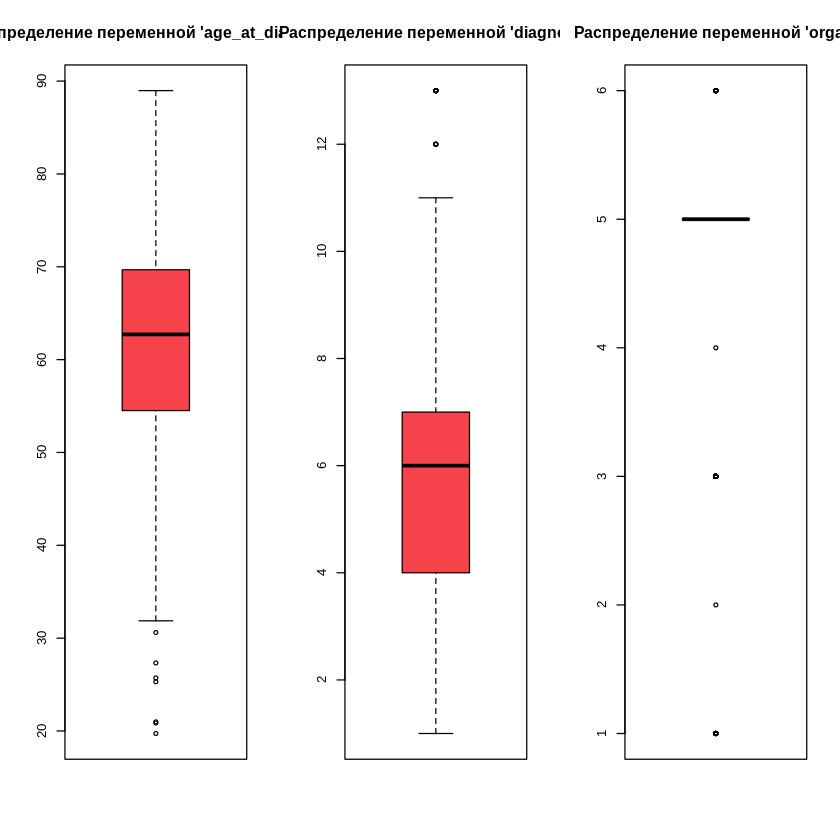

In [85]:
par(mfrow = c(1, 3))
#boxplot(data$vital_status, main="Распределение переменной 'vital_status'", names = "vital_status", col = "#f5424b")
boxplot(data$age_at_diagnosis, main="Распределение переменной 'age_at_diagnosis'", names = "age", col = "#f5424b")
#boxplot(data$gender, main="Распределение переменной 'gender'", names = "gender", col = "#f5424b")
boxplot(data$diagnosis_num, main="Распределение переменной 'diagnosis'", names = "diagnosis", col = "#f5424b")
#boxplot(data$treatment_type , main="Распределение переменной 'treatment_type '", names = "terapy", col = "#f5424b")
#boxplot(data$ajcc_pathologic_stage, main="Распределение переменной 'ajcc_pathologic_stage'", names = "stage", col = "#f5424b")
boxplot(data$organ_num, main="Распределение переменной 'organ'", names = "organ", col = "#f5424b")

ERROR: Error in density.default(data$age_at_diagnosis): 'x' contains missing values


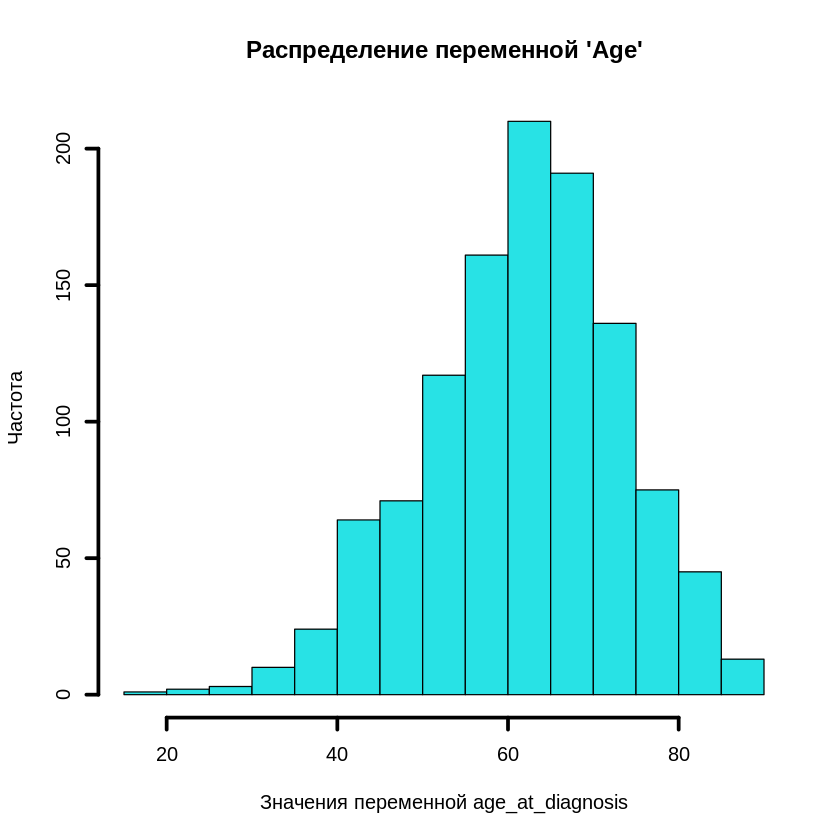

In [96]:
hist(data$age_at_diagnosis, xlab = "Значения переменной age_at_diagnosis", ylab = "Частота", main = "Распределение переменной 'Age'", col = 5, lwd=3,)
plot(density(data$age_at_diagnosis), col = 3, lwd=2, main='График плотности распределения')

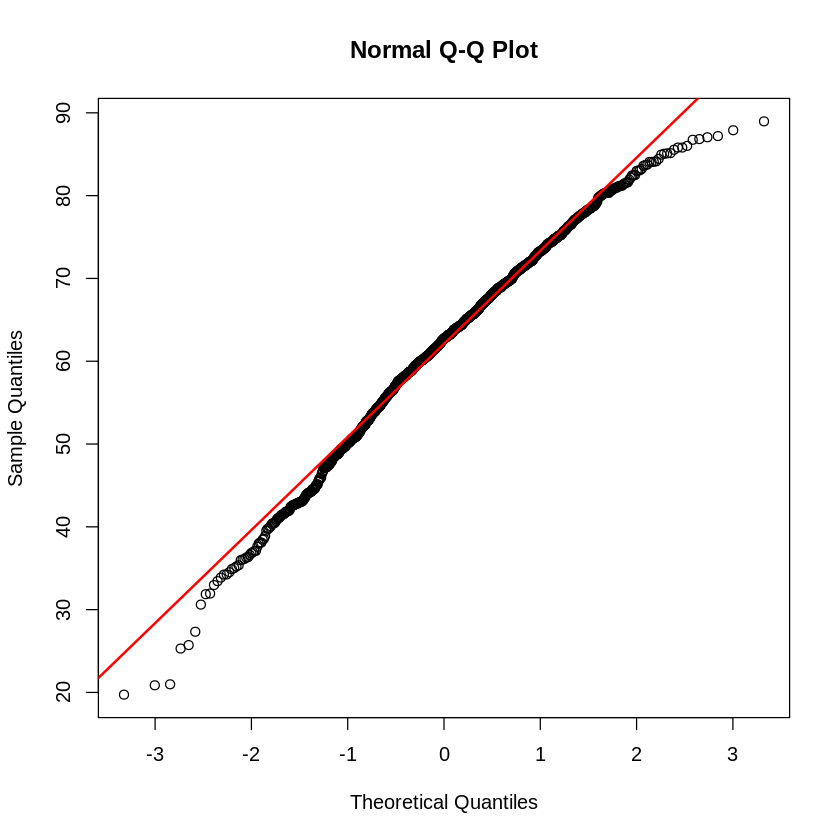

In [87]:
qqnorm(data$age_at_diagnosis)
qqline(data$age_at_diagnosis, col = 'red', lwd=2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 82 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 82 rows containing non-finite outside the scale range
(`stat_density()`).”


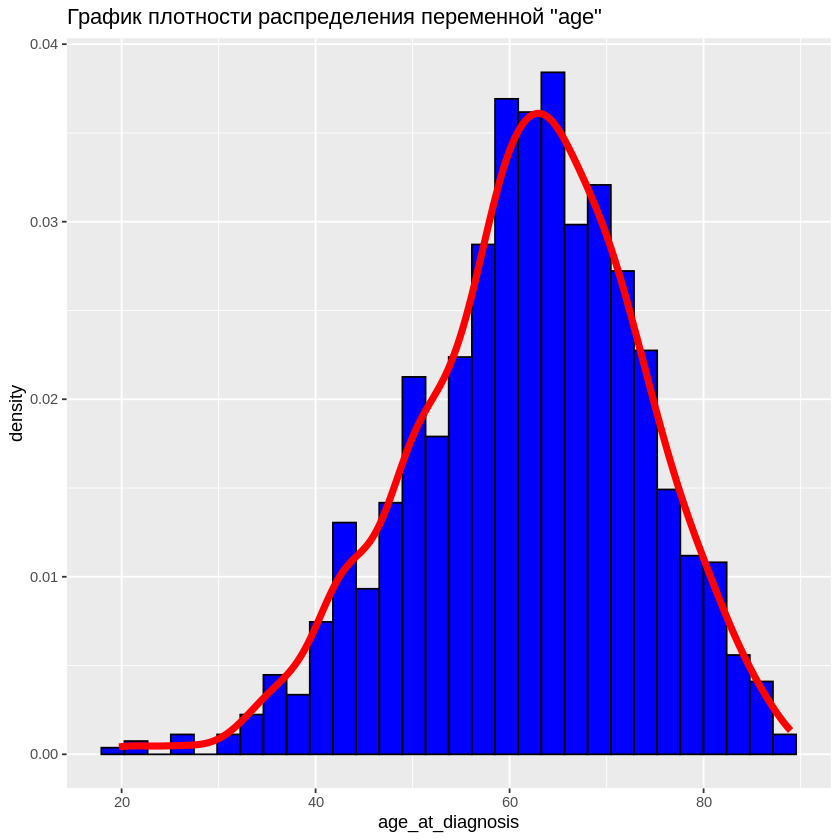

In [88]:
ggplot(data, aes(age_at_diagnosis, after_stat(density))) +
    geom_histogram(color = 'black', fill = 'blue') +
    ggtitle('График плотности распределения переменной "age"') +
    geom_density(col = 'red', lwd=2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


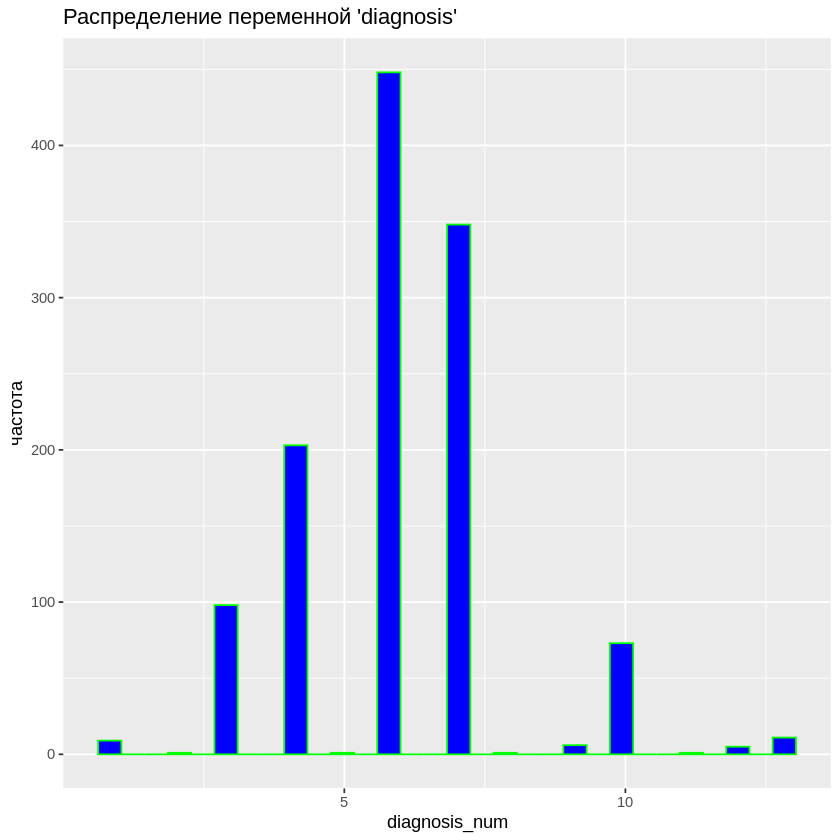

In [92]:
ggplot(data, aes(diagnosis_num)) +
    geom_histogram(color = 'green', fill = 'blue') +
    ggtitle("Распределение переменной 'diagnosis'") +
    #scale_x_log10( name = 'log10_BMI') +
    scale_y_continuous(name = 'частота')


In [95]:
shapiro.test(data$age_at_diagnosis)



	Shapiro-Wilk normality test

data:  data$age_at_diagnosis
W = 0.99034, p-value = 9.697e-07


 переменная age_at_diagnosisимеет нормальное распределение, выборки независимые, следовательно можно проводить дисперсионный анализ

In [97]:
anova_res <- aov(age_at_diagnosis ~ factor(vital_status), data = data)
anova_res
summary(anova_res)

Call:
   aov(formula = age_at_diagnosis ~ factor(vital_status), data = data)

Terms:
                factor(vital_status) Residuals
Sum of Squares               7115.64 141542.77
Deg. of Freedom                    2      1120

Residual standard error: 11.24177
Estimated effects may be unbalanced
82 observations deleted due to missingness

                       Df Sum Sq Mean Sq F value   Pr(>F)    
factor(vital_status)    2   7116    3558   28.15 1.18e-12 ***
Residuals            1120 141543     126                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
82 observations deleted due to missingness

 - "Pr(>F)" = p-значение, показывающее вероятность получить такие или более экстремальные результаты случайно. p-значение = 1.18e-12 указывает на статистическую значимость различий между группами. Нулевая гипотеза не отвергается.

## Aнализ выживаемости.


*  Создание объектов выживания и кривых

In [99]:
 data$vital_status <-as.numeric(data$vital_status)

In [100]:
Surv(data$age_at_diagnosis, data$vital_status)[1:10]

s1 <- survfit(Surv(data$age_at_diagnosis, data$vital_status) ~ 1, data = data)
str(s1)


Warning message in Surv(data$age_at_diagnosis, data$vital_status):
“Invalid status value, converted to NA”


 [1] 63.58082  65.23288  64.70411  52.33151  49.87945  62.70959  54.02192+
 [8] 36.29589        NA  65.28219+

Warning message in Surv(data$age_at_diagnosis, data$vital_status):
“Invalid status value, converted to NA”


List of 18
 $ n        : int 986
 $ time     : num [1:954] 19.7 20.9 21 25.3 25.7 ...
 $ n.risk   : num [1:954] 986 985 984 983 982 981 980 979 978 977 ...
 $ n.event  : num [1:954] 1 1 1 1 1 1 1 1 0 1 ...
 $ n.censor : num [1:954] 0 0 0 0 0 0 0 0 1 0 ...
 $ surv     : num [1:954] 0.999 0.998 0.997 0.996 0.995 ...
 $ std.err  : num [1:954] 0.00101 0.00144 0.00176 0.00203 0.00227 ...
 $ cumhaz   : num [1:954] 0.00101 0.00203 0.00305 0.00406 0.00508 ...
 $ std.chaz : num [1:954] 0.00101 0.00144 0.00176 0.00203 0.00227 ...
 $ type     : chr "right"
 $ logse    : logi TRUE
 $ conf.int : num 0.95
 $ conf.type: chr "log"
 $ lower    : num [1:954] 0.997 0.995 0.994 0.992 0.991 ...
 $ upper    : num [1:954] 1 1 1 1 0.999 ...
 $ t0       : num 0
 $ na.action: 'omit' Named int [1:219] 9 13 27 35 37 43 44 46 61 69 ...
  ..- attr(*, "names")= chr [1:219] "9" "13" "27" "35" ...
 $ call     : language survfit(formula = Surv(data$age_at_diagnosis, data$vital_status) ~ 1, data = data)
 - attr(*, "clas

In [102]:
install.packages("ggsurvfit")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [103]:
library(ggsurvfit)

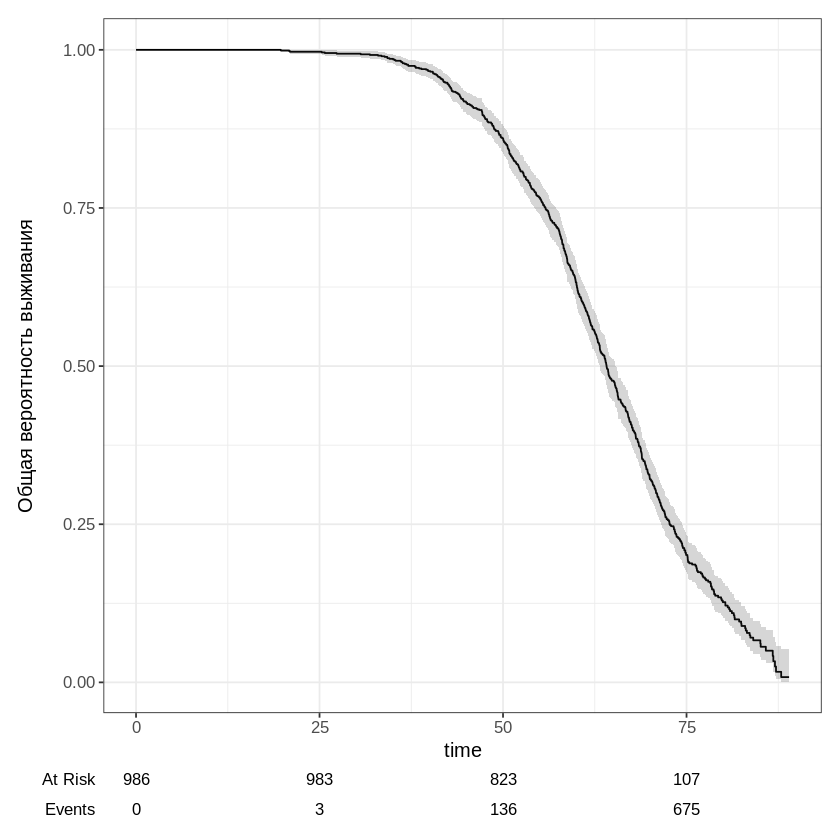

In [104]:
# Kaplan-Meier plots

s1 %>%
  ggsurvfit() +
  labs(
    x = "time",
    y = "Общая вероятность выживания"
  ) +
  add_confidence_interval() +
  add_risktable()

In [106]:
survdiff(Surv(data$age_at_diagnosis, data$vital_status) ~ treatment_type, data = data)

Warning message in Surv(data$age_at_diagnosis, data$vital_status):
“Invalid status value, converted to NA”


Call:
survdiff(formula = Surv(data$age_at_diagnosis, data$vital_status) ~ 
    treatment_type, data = data)

n=986, 219 observations deleted due to missingness.

                      N Observed Expected (O-E)^2/E (O-E)^2/V
treatment_type= NA  860      729  600.659    27.422   152.672
treatment_type=1      9        0    7.492     7.492     7.580
treatment_type=2      3        1    1.442     0.136     0.136
treatment_type=3     62        2   66.038    62.099    69.130
treatment_type=4     43        0   49.443    49.443    53.497
treatment_type=5      1        1    0.512     0.464     0.465
treatment_type=7      4        2    3.038     0.355     0.357
treatment_type=8      4        0    6.376     6.376     6.453

 Chisq= 157  on 7 degrees of freedom, p= <2e-16 

In [107]:
survdiff(Surv(data$age_at_diagnosis, data$vital_status) ~ ajcc_pathologic_stage, data = data)

Warning message in Surv(data$age_at_diagnosis, data$vital_status):
“Invalid status value, converted to NA”


Call:
survdiff(formula = Surv(data$age_at_diagnosis, data$vital_status) ~ 
    ajcc_pathologic_stage, data = data)

n=986, 219 observations deleted due to missingness.

                             N Observed Expected (O-E)^2/E (O-E)^2/V
ajcc_pathologic_stage= NA  736      729    490.4     116.1     354.7
ajcc_pathologic_stage=1     18        1     20.0      18.1      18.6
ajcc_pathologic_stage=2     29        0     33.7      33.7      35.7
ajcc_pathologic_stage=3    131        0    129.1     129.1     158.1
ajcc_pathologic_stage=4     49        5     42.2      32.8      34.9
ajcc_pathologic_stage=5     23        0     19.7      19.7      20.3

 Chisq= 355  on 5 degrees of freedom, p= <2e-16 

Warning message in Surv(data$age_at_diagnosis, data$vital_status):
“Invalid status value, converted to NA”


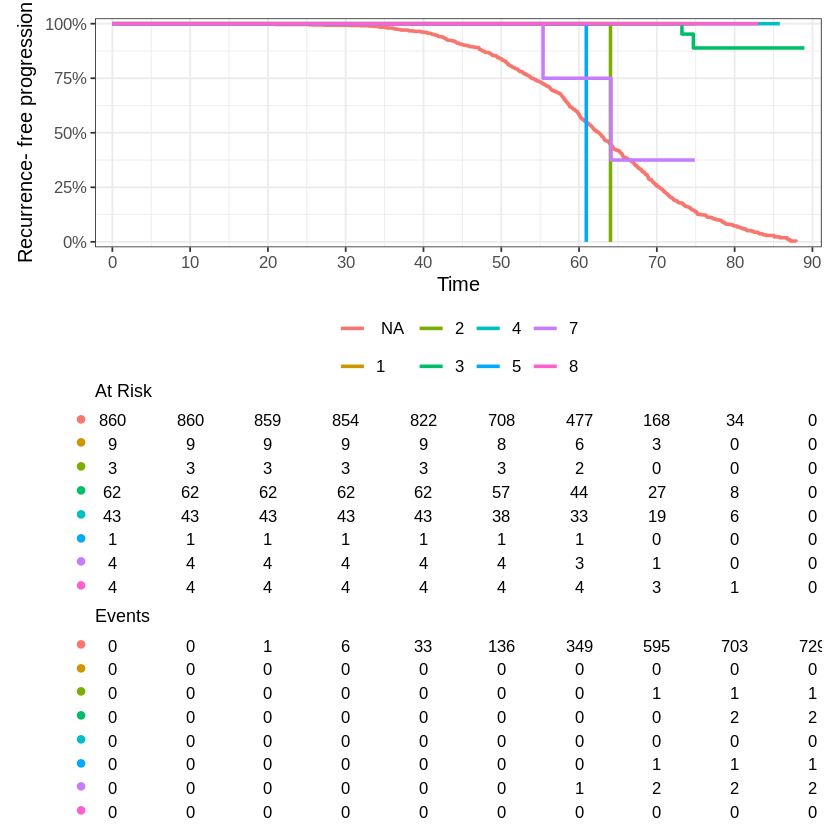

In [108]:
# График выживаемости в зависимости от типа лечения

survfit2(Surv(data$age_at_diagnosis, data$vital_status) ~ treatment_type, data = data) |>
  ggsurvfit(linewidth = 1) +
  add_risktable(risktable_group = 'risktable_stats') +
  scale_ggsurvfit() +
  labs(y = 'Recurrence- free progression') +
  add_risktable_strata_symbol(symbol = '\U25CF', size = 12)

In [ ]:
# График выживаемости в зависимости от морфологии опухоли
survfit2(Surv(time, status) ~ surg, data = col) |>
  ggsurvfit(linewidth = 1) +
  add_risktable(risktable_group = 'risktable_stats') +
  scale_ggsurvfit() +
  labs(y = 'Recurrence- free progression') +
  add_risktable_strata_symbol(symbol = '\U25CF', size = 12)

Warning message in Surv(data$age_at_diagnosis, data$vital_status):
“Invalid status value, converted to NA”


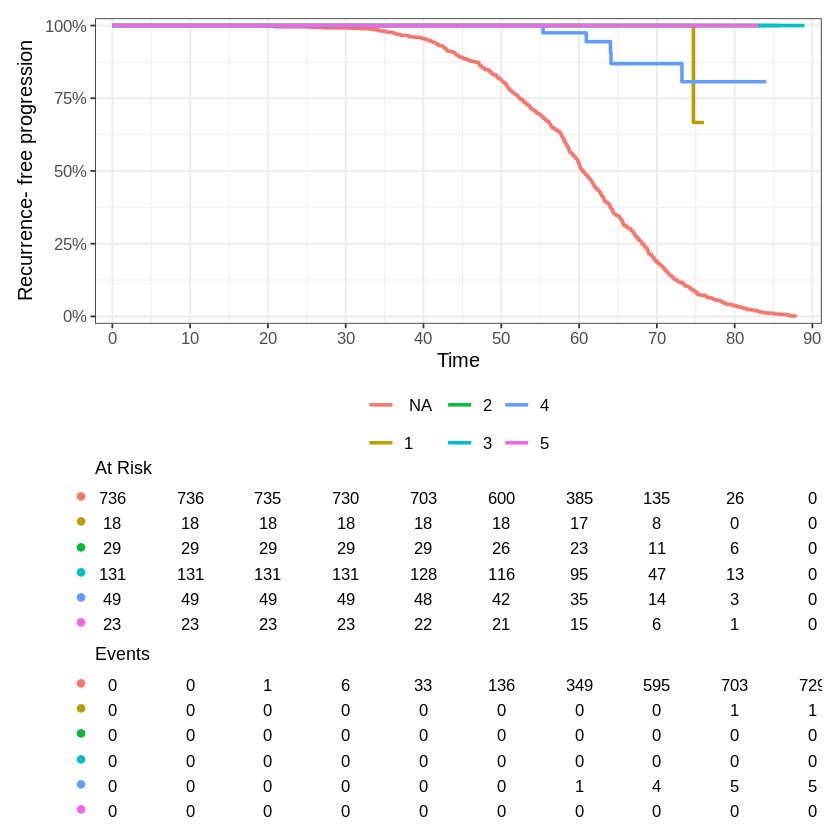

In [110]:
# График выживаемости в зависимости от стадии заболевания
survfit2(Surv(data$age_at_diagnosis, data$vital_status) ~ ajcc_pathologic_stage, data = data) |>
  ggsurvfit(linewidth = 1) +
  add_risktable(risktable_group = 'risktable_stats') +
  scale_ggsurvfit() +
  labs(y = 'Recurrence- free progression') +
  add_risktable_strata_symbol(symbol = '\U25CF', size = 12)

Warning message in Surv(data$age_at_diagnosis, data$vital_status):
“Invalid status value, converted to NA”


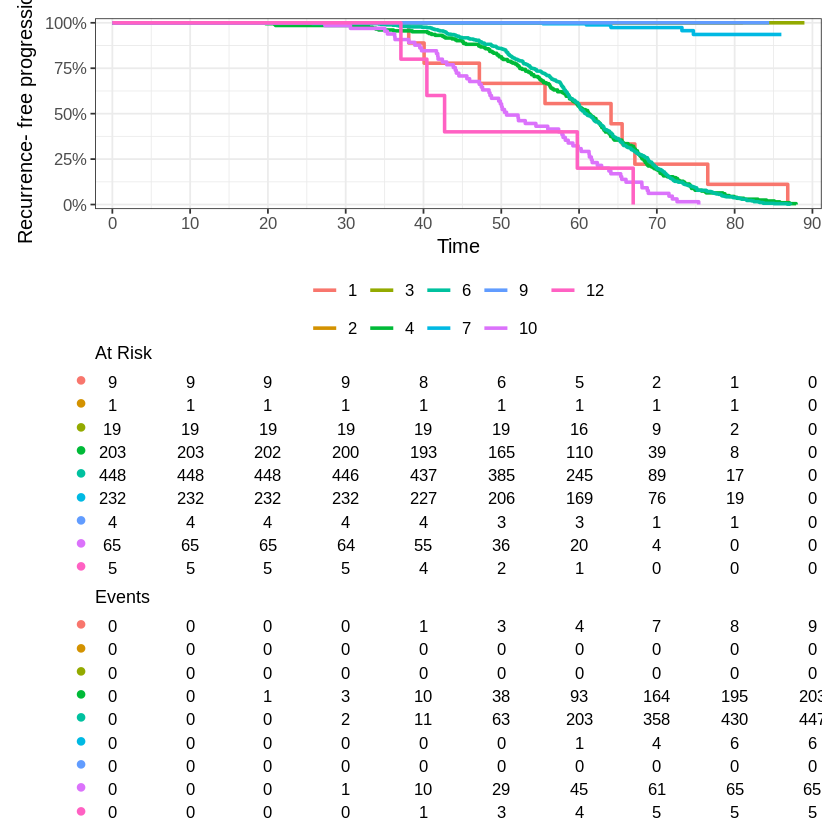

In [113]:
# График выживаемости в зависимости от первичного диагноза
survfit2(Surv(data$age_at_diagnosis, data$vital_status) ~ diagnosis_num, data = data) |>
  ggsurvfit(linewidth = 1) +
  add_risktable(risktable_group = 'risktable_stats') +
  scale_ggsurvfit() +
  labs(y = 'Recurrence- free progression') +
  add_risktable_strata_symbol(symbol = '\U25CF', size = 12)

Warning message in Surv(data$age_at_diagnosis, data$vital_status):
“Invalid status value, converted to NA”


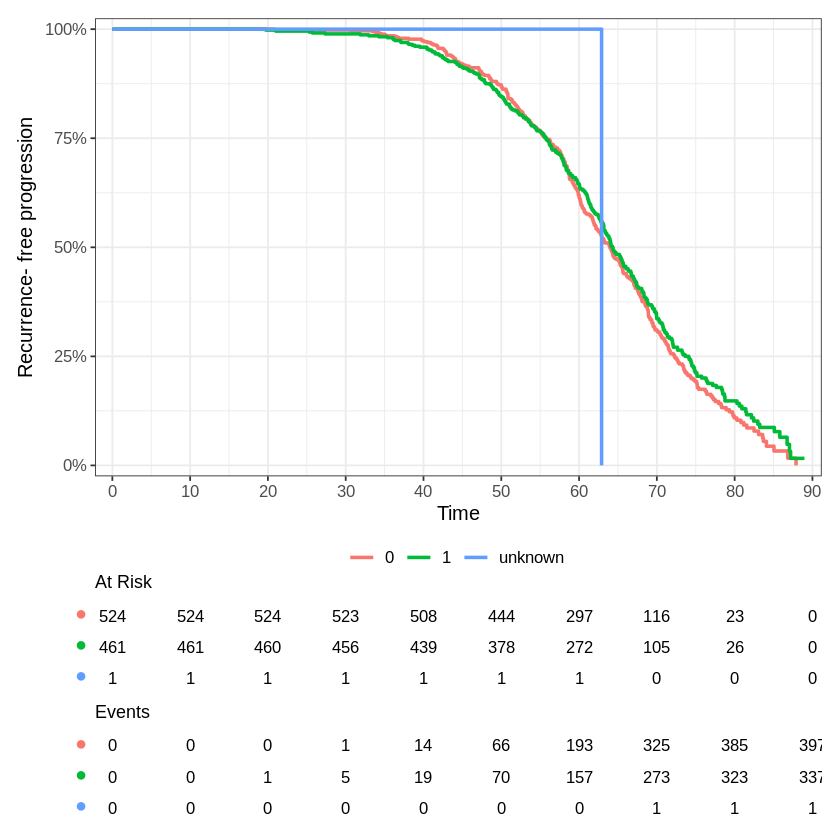

In [114]:
# График выживаемости в зависимости от пола
survfit2(Surv(data$age_at_diagnosis, data$vital_status) ~ gender, data = data) |>
  ggsurvfit(linewidth = 1) +
  add_risktable(risktable_group = 'risktable_stats') +
  scale_ggsurvfit() +
  labs(y = 'Recurrence- free progression') +
  add_risktable_strata_symbol(symbol = '\U25CF', size = 12)

### Анализ факторов, влияющих на риск(модель Кокса)

In [115]:
cox <- coxph(Surv(data$age_at_diagnosis, data$vital_status) ~  gender , data = data)

Warning message in Surv(data$age_at_diagnosis, data$vital_status):
“Invalid status value, converted to NA”


In [116]:
cox_fit <- survfit(cox)

Warning message in Surv(data$age_at_diagnosis, data$vital_status):
“Invalid status value, converted to NA”


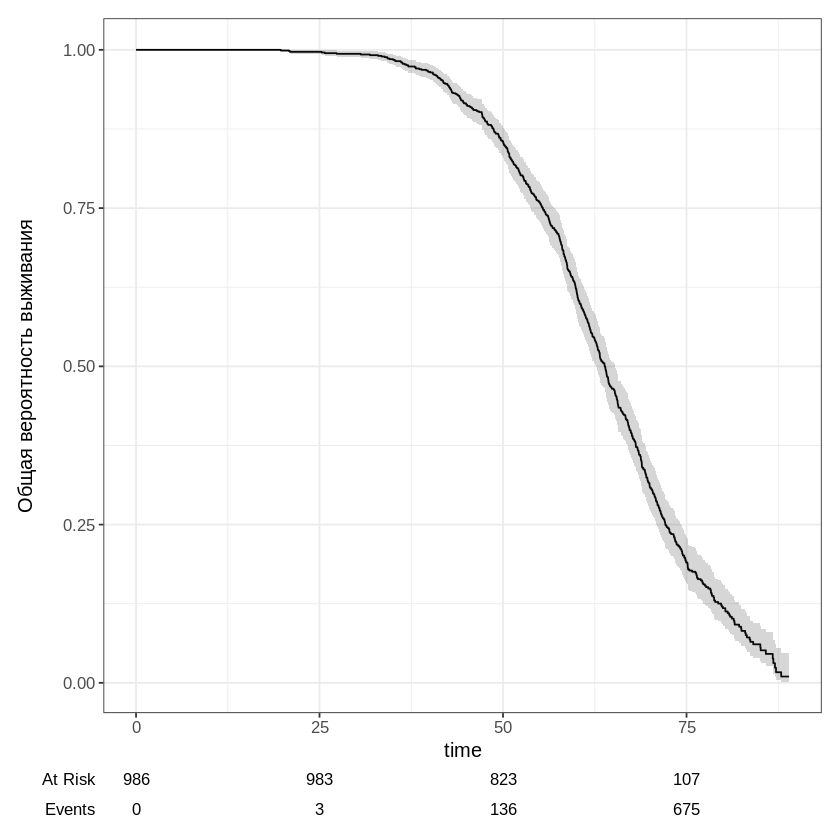

In [117]:
cox_fit %>%
  ggsurvfit() +
  labs( x = "time", y = "Общая вероятность выживания" ) +
  add_confidence_interval() +
  add_risktable()

In [118]:
# Добавим еще факторов
cox1 <- coxph(Surv(data$age_at_diagnosis, data$vital_status) ~ treatment_type + diagnosis_num + gender + age_at_diagnosis, data = data)
cox_fit1 <- survfit(cox1)

Warning message in Surv(data$age_at_diagnosis, data$vital_status):
“Invalid status value, converted to NA”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“one or more coefficients may be infinite”
Warning message in Surv(data$age_at_diagnosis, data$vital_status):
“Invalid status value, converted to NA”


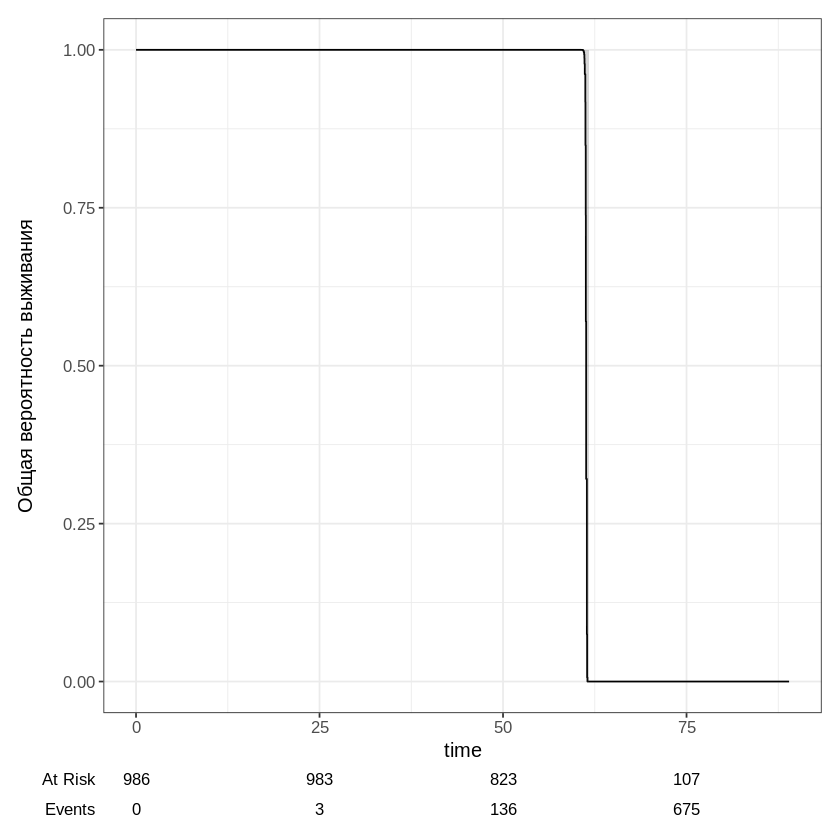

In [119]:
cox_fit1 %>%
  ggsurvfit() +
  labs(
    x = "time",
    y = "Общая вероятность выживания"
  ) +
  add_confidence_interval() +
  add_risktable()